# Solving the Capacitated Vehicle Routing Problem (CVRP) in Python!

Welcome to this notebook dedicated to solving the Capacitated Vehicle Routing Problem (CVRP), it is a classical combinatorial optimization problem that arises in many logistic applications such as goods distribution, vehicle fleet management, and delivery route planning.

In this notebook, we will explore various techniques to solve the CVRP. We will start by defining the problem and its constraints, then discuss algorithmic approaches to solve it. We will implement these approaches using Python and libraries such as NumPy and Matplotlib.

The goal of this notebook is to provide an in-depth understanding of CVRP as well as practical solutions to solve it efficiently. Whether you are a computer science student, a logistics professional, or simply curious to learn more about optimization problems, this notebook will equip you with the knowledge and tools to tackle the CVRP.

Let's start by importing the necessary libraries and defining the problem. Happy exploring!







In [1]:
!pip install pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from pyvis.network import Network

### Explanation of the CVRP

The Capacitated Vehicle Routing Problem (CVRP) is a well-studied combinatorial optimization problem in the field of logistics. It involves efficiently planning routes for a set of vehicles to deliver goods to a set of customers from a central depot while respecting the vehicles' capacity constraints.

The objective of the CVRP is to minimize the total distance traveled by the vehicles while satisfying the demands of all customers and not exceeding the vehicles' maximum capacities. This problem is NP-hard, meaning that there is no efficient algorithm to solve large instances in a reasonable amount of time.

### Example of CVRP

- **Central Depot** : Starting and returning location for the vehicles.
- **Customers** :
  - Customer 1: Demand of 10 units of goods.
  - Customer 2: Demand of 15 units of goods.
  - Customer 3: Demand of 20 units of goods.
  - Customer 4: Demand of 5 units of goods.
  - Customer 5: Demand of 30 units of goods.

- **Vehicles** :
  - Maximum capacity of all vehicles: 50 units.

In this example, the objective would be to plan the vehicles' routes in a way that satisfies the demands of all customers while respecting the vehicles' maximum capacity and minimizing the total distance traveled by the vehicles.


# Data Required for the CVRP

The Capacitated Vehicle Routing Problem (CVRP) is a classical optimization challenge where a fleet of vehicles needs to be used to deliver goods to a set of customers from a central depot, taking into account the maximum load capacities of each vehicle.

To address this problem, we need the following elements:

- **Number of Vehicles**: Indicates the total number of vehicles available for making deliveries.

- **Vehicle Capacities**: Represents the maximum load capacity of each vehicle. This value is important to ensure that deliveries adhere to the vehicle's load limits.

- **Number of Customers**: Corresponds to the total number of customers to be delivered to. This includes all delivery points outside the depot.

- **Customer Demands**: Each customer has a specific demand, indicating the amount of goods to be delivered to that particular customer.

- **Population Size in Each Generation**: For evolutionary or genetic algorithms, the population size is a crucial parameter that influences the convergence and quality of the generated solutions.

Make sure to specify these data accurately so that the problem can be efficiently solved.


In [3]:
nb_vehicule = int(input("Give the number of vehicles : "))

Give the number of vehicles : 3


In [4]:
cp_vehicule = float(input("Give the capacity of the vehicles : "))

Give the capacity of the vehicles : 21


In [5]:
nb_client = int(input("Give the number of costumers : "))

Give the number of costumers : 5


In [8]:
demande_client = []
for i in range(1, nb_client + 1) :
  demande = float(input(f"give the demand of costumer {i} : "))
  demande_client.append(demande)
demande_client

give the demand of costumer 1 : 7
give the demand of costumer 2 : 9
give the demand of costumer 3 : 8
give the demand of costumer 4 : 10
give the demand of costumer 5 : 9


[7.0, 9.0, 8.0, 10.0, 9.0]

### Creating the Distance Matrix between All Customers and the Depot

To solve the Capacitated Vehicle Routing Problem (CVRP), we need to calculate the distances between each customer and the depot. This distance matrix helps in optimizing the routes for the vehicles.

The distance matrix is a square matrix where each row and column represents a location (customer or depot), and the value at the intersection of row i and column j represents the distance between location i and location j.


In [9]:
matrice_distance = np.array([[0 if i == j else random.randint(1, 1000) for i in range(nb_client + 1)]for j in range(nb_client +1)])
matrice_distance += matrice_distance.T
np.fill_diagonal(matrice_distance, 0)
matrice_distance

array([[   0, 1076,  526, 1153,  838, 1749],
       [1076,    0,  454,  361,  320, 1053],
       [ 526,  454,    0, 1216,  813,  691],
       [1153,  361, 1216,    0,  895,  267],
       [ 838,  320,  813,  895,    0,  346],
       [1749, 1053,  691,  267,  346,    0]])

In [10]:
nb_individus = int(input("Give the number of individuals in each generation : "))

Give the number of individuals in each generation : 10


# Genetic Algorithm for CVRP Resolution

The genetic algorithm is an optimization method inspired by the process of natural selection. It relies on the concept of evolution, where candidate solutions are combined, mutated, and selected to generate new solutions iteratively until a satisfactory solution is found.

## How Genetic Algorithm Works

1. **Population Initialization**: An initial population of solutions is randomly generated.

2. **Fitness Evaluation**: Each solution is evaluated using a fitness function that measures its quality in terms of CVRP performance, such as the total distance traveled by the vehicles.

3. **Parent Selection**: Solutions are selected for reproduction based on their fitness score. Higher-quality solutions have a higher probability of being selected.

4. **Crossover**: Selected parent solutions are combined to produce new child solutions. This involves recombining features of parent solutions.

5. **Mutation**: Random mutation is applied to some child solutions to introduce diversity into the population. This allows exploration of new search spaces.

6. **Fitness Evaluation of New Population**: The new solutions are evaluated in terms of fitness to determine their quality.

7. **Survivor Selection**: The best solutions from the current population, along with the generated children, are selected to form the next generation of the population.

8. **Repeating the Process**: The steps of selection, crossover, mutation, and fitness evaluation are repeated over multiple generations until a satisfactory solution is found or until a certain stopping criterion is reached.

## Why Genetic Algorithm for CVRP?

The genetic algorithm is well-suited for solving combinatorial optimization problems like CVRP for several reasons:

- **Exploration of Search Space**: The genetic algorithm effectively explores the solution space using genetic operators such as crossover and mutation.
  
- **Adaptability**: It can adapt to a variety of problems and constraints, making it applicable to problems like CVRP that have specific characteristics and complex constraints.
  
- **Parallelism**: The genetic algorithm can be easily parallelized, allowing efficient utilization of available computational resources to speed up solution search.

By using the genetic algorithm, we can effectively explore the solution space to find high-quality solutions to CVRP, even in situations where the search space is vast and complex.


## Introduction to Key Hyperparameters for a Genetic Algorithm

Genetic algorithms are popular optimization methods used to solve a variety of optimization problems, including the well-known Vehicle Routing Problem (VRP). These algorithms draw inspiration from the natural selection and evolution process to search for efficient solutions within a given search space.

Before delving into the details of implementing a genetic algorithm for VRP, it's essential to understand the key hyperparameters that influence its behavior and performance. Two of these hyperparameters are particularly critical: the mutation rate and the number of generations.

In this section, we will examine these hyperparameters and their role in the optimization process. We'll discuss how they affect the exchange of optimal solutions and their impact on the algorithm's ability to converge to high-quality solutions for VRP.

### Essential Hyperparameters for a Genetic Algorithm

Now, let's take a closer look at two of the most essential hyperparameters for a genetic algorithm:

- **Mutation Rate**: The mutation rate controls the probability that a mutation will be applied to a solution during reproduction. A higher mutation rate can introduce greater diversity into the population, which can help explore new solution spaces, but too high a rate can also lead to chaotic exploration and algorithm stagnation.

- **Number of Generations**: The number of generations determines the number of iterations the algorithm will perform before stopping. Insufficient generations may not allow the algorithm to converge to an optimal solution, while an excessive number of generations can lead to overfitting and wasted computation time.

These hyperparameters play a crucial role in the performance and convergence of the genetic algorithm. Proper tuning of these parameters can significantly influence the exchange of optimal solutions and the algorithm's ability to find high-quality solutions for problems like the VRP.



# Necessary Functions for Solving CVRP by Evolutionary Algorithm

1. **PI()**: This function is responsible for generating the initial population for the evolutionary algorithm. It creates a set of initial solutions that will serve as the starting point for searching for solutions to the CVRP.


In [11]:
def PI() :
  population = []
  clients = list(range(1, nb_client +1))
  for _ in range(nb_individus) :
    random.shuffle(clients)
    population.append(clients[:])
  return population

2. **transform(solution)**: Transforms a given solution, represented as a list, into a list of routes. This transformation aims to make the solution more readable and manipulable.


In [14]:
def transform(solution, demandes= demande_client, nb_vehicule = nb_vehicule) :

    trajet_v = [[] for _ in range(nb_vehicule)]  # Une liste de listes pour stocker les trajets de chaque véhicule
    cp = cp_vehicule # initialiser la capacitè des vehicules
    vehicule_idx = 0  # Indice du véhicule actuel
    trajet_v[vehicule_idx].append(0) # le premier vehicule commence a partir de depot

    for client in solution :
        if demandes[client - 1] <= cp :  # Vérifiez si la demande du client peut être satisfaite
            cp -= demandes[client - 1]
            trajet_v[vehicule_idx].append(client)

        else :
            # Si la demande du client ne peut pas être satisfaite, passez au véhicule suivant
            trajet_v[vehicule_idx].append(0) # le vehicule retourne au dèpot
            vehicule_idx += 1 # avancer vers le prochaine vehicule
            cp = cp_vehicule  # Réinitialisez la capacité du vehicule
            trajet_v[vehicule_idx].append(0) # le prochain vehicule commence a partir de dèpot
            trajet_v[vehicule_idx].append(client)
            cp -= demandes[client-1]

    for chemin in trajet_v :
        if len(chemin) == 0 :
            chemin.extend([0, 0])
        elif chemin[-1] != 0 :
            chemin.append(0)

    return trajet_v

3. **fitness(solution)**: Calculates the total distance traveled by all vehicles in their routes for a given solution of the CVRP. This function provides a performance measure to evaluate the solution's quality.



In [15]:
def fitness(solution, matrice_distance = matrice_distance) :
  trajets_vehicules = transform(solution)
    # Calcul du score de fitness
  score = 0
  for trajet in trajets_vehicules:
    for client in range(len(trajet) -1) :
      # Ajouter la distance entre les clients consécutifs dans x
      score += matrice_distance[trajet[client]][trajet[client + 1]] #trajet i cest la ligne de client actuelle et le trajet i+1 cest la colonne de prochain client
  return score

4. **solution_score(solution)**: Takes a solution as input and returns a dictionary containing two fields: 'solution', representing the solution itself, and 'score_fitness', indicating the solution's fitness score calculated by the fitness function.


In [16]:
def solution_score(solution) :
  dict_solution_score = {}
  score = fitness(solution)
  dict_solution_score["solution"] = solution
  dict_solution_score["score fitness"] = score
  return dict_solution_score

5. **croisement(parent1, parent2)**: Takes two parent solutions as input and applies a crossover process to generate new child solutions. This allows exploration of new solution spaces by combining features of the parent solutions.



In [17]:
def croisement(parent1, parent2):
    # Choix du point de croisement
    point_croisement = int(nb_client / 2)

    # Création des solutions filles initialisées avec des valeurs nulles
    enfant1 = [0] * len(parent1)
    enfant2 = [0] * len(parent2)

    # Ajout de la partie avant le point de croisement
    enfant1[:point_croisement] = parent1[:point_croisement]
    enfant2[:point_croisement] = parent2[:point_croisement]

    # Ajout de la partie après le point de croisement, en évitant les répétitions
    enfant1_point_croisement = set(enfant1[:point_croisement])
    enfant2_point_croisement = set(enfant2[:point_croisement])

    for client in parent2:
        if client not in enfant1_point_croisement:
            enfant1[point_croisement] = client
            enfant1_point_croisement.add(client)
            break

    for client in parent1:
        if client not in enfant2_point_croisement:
            enfant2[point_croisement] = client
            enfant2_point_croisement.add(client)
            break

# Compléter les solutions filles avec les éléments manquants
    for i in range(nb_client):
        if enfant1[i] == 0:
            for client in parent2:
                if client not in enfant1_point_croisement:
                    enfant1[i] = client
                    enfant1_point_croisement.add(client)
                    break

        if enfant2[i] == 0:
            for client in parent1:
                if client not in enfant2_point_croisement:
                    enfant2[i] = client
                    enfant2_point_croisement.add(client)
                    break

    return enfant1, enfant2


6. **creation_nouvelle_generation(generation)**: Takes a generation of solutions as input and generates a new generation using operators such as crossover. It progressively evolves solutions towards higher-quality solutions.



In [18]:
def creation_nouvelle_generation(population) :
  nouvelle_generation = []
  for _ in range(nb_individus) :
      parent1, parent2 = random.sample(population, k= 2) # selection de deux parents aleatoirement
      enfant1, enfant2 = croisement(parent1, parent2) # appelle a la fonction croisement pour generer deux solutions enfants a partir des deux parents
      nouvelle_generation.extend([parent1, parent2, enfant1[:], enfant2[:]]) # ajouter a la nouvelle generation les deux enfants avec leurs parents
  return nouvelle_generation

7. **selectionGen(generation)**: Sorts the generation of solutions based on their fitness score, ranking them in descending order of performance. This facilitates the selection of the best solutions for the next generation.



In [19]:
def selectionGen(generation) :
  generation = sorted(generation, key= lambda solution:solution["score fitness"], reverse= True)
  meilleurs_solutions = generation[:nb_individus]
  return meilleurs_solutions

8. **mutation(solution, taux_mutation)**: Takes a solution as input and applies mutation with a certain probability defined by the mutation rate. This operation introduces random variation in the solutions to explore new search spaces.



In [21]:
def mutation_taux(generation, taux_mutation):
  nb_solution_mute = int((taux_mutation * nb_individus) / 100) # nombre de solution a faire la mutation

  Solution_aleatoires = random.sample(generation, k= nb_solution_mute) # choisir un nombre spècifique des solutions aleatoires depuis la generation actuelle
  client = random.choice(range(nb_client-1))

  # faire la permutation entre les deux client de la solution
  for solution_aleatoire in Solution_aleatoires :
    x = solution_aleatoire["solution"][client]
    solution_aleatoire["solution"][client] = solution_aleatoire["solution"][client + 1]
    solution_aleatoire["solution"][client + 1] = x

  # dans cette partie on va calculer le score fitness de la solution apres le changement
  for solution_aleatoire in Solution_aleatoires :
    score = fitness(solution_aleatoire['solution'])
    solution_aleatoire["score fitness"] = score

# Main Program for Solving CVRP by Evolutionary Algorithm

The main program orchestrates the execution of the evolutionary algorithm to solve the Capacitated Vehicle Routing Problem (CVRP). It combines the necessary functions and algorithms to generate solutions, evaluate their fitness, perform genetic operations, and evolve the population over multiple generations.



In [29]:
nb_iteration = int(input("Give the number of iterations (generations) : "))

Give the number of iterations (generations) : 200


In [42]:
# creation de la population initiale
population = PI()

# creation de graphe (solution optimale - nombre de generation )
solutions_optimales = [] # liste qui contient les solutions optimales des differentes generations
n = int(nb_iteration / 8) # a chaque n iteration (generation) on va prendre la solution optimale
iteration = []

# creation de graphe (solution optimale - taux mutation)
taux_m = np.linspace(0, 0.4, n)
for i, taux in enumerate(taux_m) :
  taux_m[i] = int(taux * 100)
taux_m = np.delete(taux_m, 0)
TM = [] # liste qui contient les solutions optimales differente taux de mutation

for taux in taux_m :
  for _ in range(nb_iteration) :
    if _ == 0 : # dans la premeire iteration on prend la population initiale pour develloper une la nouvelle generation
        generation = creation_nouvelle_generation(population)
    else : # sinon on dèmarre par la la generation prècèdente
        generation = creation_nouvelle_generation(generation)

    for i, solution in enumerate(generation): # partie d'èvalluation
        generation[i] = solution_score(solution)

    generation = selectionGen(generation) # partie de Selection
    mutation_taux(generation, taux) # partie de mutation

    generation = [solution['solution'] for solution in generation] # prendre seulement le champ "solution" de chaque dictionnaire de generation avant la prochaine iteration

    solution_optimale = generation[0] # la meilleure solution de la generation actuelle

    # prednre la solution optimale chaque n iterations
    if taux == 1 :
      if _ % n == 0 :
        solutions_optimales.append(solution_optimale)
        iteration.append(_)

  TM.append(solution_optimale) # la meilleure solution obtenu a la derniere generation (solution optimale) est ajouter au TM

print(f"la solution optimale est {solution_optimale} et avec un taux de mutation de {taux} son score : {fitness(solution_optimale)}")

la solution optimale est [4, 1, 3, 2, 5] et avec un taux de mutation de 40.0 son score : 8627


In [43]:
transform(solution_optimale)

[[0, 4, 1, 0], [0, 3, 2, 0], [0, 5, 0]]

# Graphical Representation of Fitness Score Evolution

Visualizing the evolution of fitness scores over generations can provide valuable insights into the performance and convergence behavior of the evolutionary algorithm for solving the Capacitated Vehicle Routing Problem (CVRP)





## Evolution of Optimal Fitness Score per Generation

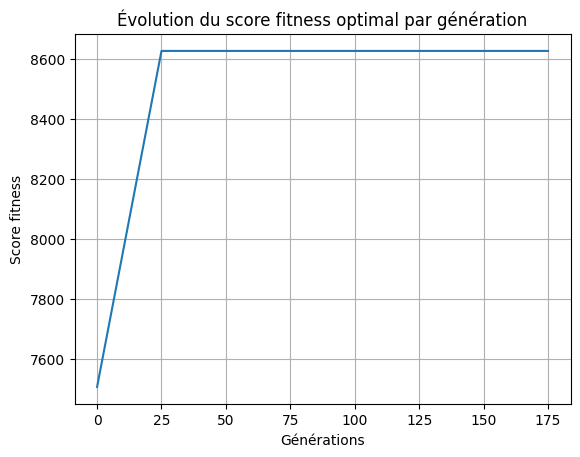

In [44]:
Score_generation = []
for solution in solutions_optimales :
  score = fitness(solution)
  Score_generation.append(score)

plt.plot(iteration, Score_generation)
plt.grid(True)
plt.title("Évolution du score fitness optimal par génération")
plt.xlabel("Générations")
plt.ylabel("Score fitness")
plt.show()

### Interpretation of the Graph

The graph depicts the evolution of the optimal fitness score per generation for a genetic algorithm. The optimal fitness score represents the performance of the best solution found in each generation. The x-axis represents the number of generations, while the y-axis represents the fitness score.

#### Observations

* **Initial Rapid Growth**: Initially, the fitness score increases rapidly over the first 25 generations. This suggests that the optimization algorithm found an optimal solution quite quickly. This initial growth phase may be due to the algorithm exploring the solution space.

* **Plateau**: After this initial growth, the curve flattens significantly. This means that subsequent generations bring very marginal improvements to the fitness score. It's possible that the optimal solution has been reached, and additional generations are merely refining this solution. This plateau may indicate that the algorithm has converged to a stable solution.

* **Stability**: The stability of the fitness score after the initial phase can be an indicator of the effectiveness of the optimization algorithm. If the score remains constant, it may mean that the algorithm has converged to an optimal solution, and there are no significant gains to be expected from future generations.


## Genetic Algorithm Put to the Test of Mutation Rate

The genetic algorithm's performance can be greatly influenced by the mutation rate. This parameter controls the probability of introducing random changes to the solutions during reproduction. Let's explore how different mutation rates affect the algorithm's behavior and effectiveness in solving the Capacitated Vehicle Routing Problem (CVRP).

#### Low Mutation Rate

- **Effectiveness**: With a low mutation rate, the algorithm may converge quickly to a local optimum, as it relies more on crossover operations to explore the solution space. This can lead to premature convergence and suboptimal solutions.
- **Exploration**: Limited mutation decreases the algorithm's ability to explore new solution spaces, potentially missing out on better solutions.
- **Stagnation**: The algorithm may stagnate in regions of the search space without sufficient diversity to escape local optima.

#### High Mutation Rate

- **Exploration**: A high mutation rate introduces more randomness into the population, promoting exploration of diverse solution spaces.
- **Diversity**: Increased mutation encourages diversity within the population, preventing premature convergence and facilitating the discovery of novel solutions.
- **Convergence**: However, excessively high mutation rates may hinder convergence, as frequent random changes can disrupt the evolution of promising solutions.

#### Optimal Mutation Rate

- **Balance**: The optimal mutation rate strikes a balance between exploration and exploitation, allowing the algorithm to efficiently navigate the solution space while avoiding premature convergence.
- **Fine-tuning**: Finding the optimal mutation rate often requires experimentation and fine-tuning, as it depends on the problem characteristics and the algorithm's other parameters.

By testing the genetic algorithm with different mutation rates, we can gain insights into its robustness, convergence behavior, and ability to find high-quality solutions for the CVRP.


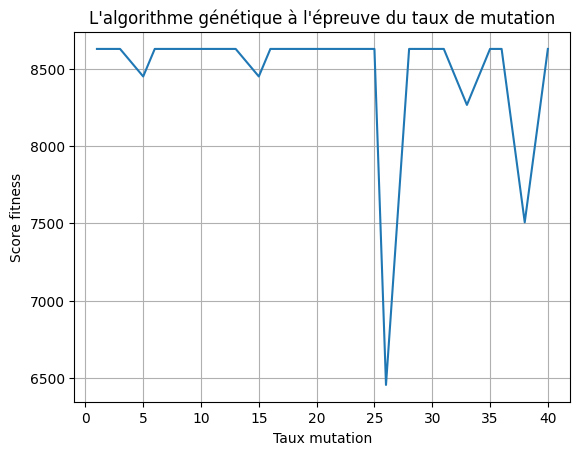

In [45]:
score_mutation = []
for solution in TM :
  score = fitness(solution)
  score_mutation.append(score)

plt.plot(taux_m, score_mutation)
plt.grid(True)
plt.title("L'algorithme génétique à l'épreuve du taux de mutation")
plt.xlabel("Taux mutation")
plt.ylabel("Score fitness")
plt.show()

### Interprétation du Graphe

Le graphe montre l’évolution du score fitness optimal par la variation de taux de mutation pour un algorithme génétique. Le score fitness optimal représente la performance de la meilleure solution trouvée à chaque génération. L’axe des abscisses (X) représente la variation de taux de mutation, tandis que l’axe des ordonnées (Y) représente le score fitness.

#### Observations

L’analyse du graphe suggère qu’un taux de mutation modéré peut être efficace pour guider l’algorithme génétique vers des solutions de qualité dans le cadre du VRP. Le choix judicieux du taux de mutation est crucial pour optimiser les performances de l’algorithme.

- Le graphe met en évidence que le taux de mutation de 26 pour-cent a permis d’obtenir une solution proche de l’optimum. Ce résultat suggère qu’un taux de mutation modéré peut être efficace pour guider l’algorithme vers des solutions de qualité dans le cadre du VRP.

- L’observation d’une performance optimale à 26 pour-cent souligne l’importance du choix judicieux du taux de mutation. Un taux trop élevé peut entraîner une exploration chaotique de l’espace des solutions, empêchant l’algorithme de converger vers des solutions optimales. À l’inverse, un taux trop faible risque de ralentir la convergence et de limiter l’exploration de solutions potentiellement prometteuses.


# Representation of the Optimal Solution in Graph

After executing our genetic algorithm to solve the Vehicle Routing Problem (CVRP), we obtained an optimal solution that can be graphically represented as follows:

![graphe principale](graphe principale.png)

In this graph:

- Each node represents a customer to be served.
- The edges between nodes represent the routes taken by the delivery vehicles to serve the customers.
- Different colors or styles can be used to represent different vehicles or groups of customers.

This graphical representation provides a clear visualization of the optimal solution to the CVRP, facilitating the understanding of delivery route planning and enabling the evaluation of the obtained solution's quality.


In [46]:
def donnees_graphe(solution_optimale):
    # Collecte des données des clients et des trajets de véhicules
    clients = list(range(1, nb_client + 1))
    trajets_vehicules = transform(solution_optimale)

    return clients, trajets_vehicules

In [47]:
def creation_graphe_cvrp(clients, trajets_vehicules):
    # Création du graphe avec Pyvis
    graphe = Network(height="750px", width="100%", bgcolor="#222222", font_color=True)

    # Couleurs des sommets
    couleurs = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#FFA500", "#800080", "#FFC0CB", "#00FFFF", "#808080"]
    couleurs_existent = []

    for client in clients :
      graphe.add_node(client, label = f"Client {client}")

    # Ajout du dépôt
    graphe.add_node(0, label="Dépôt", color = '#000000')

    # Ajout des trajets de véhicules
    for trajet in trajets_vehicules:
        for client in range(len(trajet) - 1):
            graphe.add_edge(trajet[client], trajet[client + 1], width=5, color="#FFFFFF")

    # Ajout des couleurs pour les clients sur les trajets
    for trajet in trajets_vehicules:

        couleur = random.choice(couleurs)
        while couleur in couleurs_existent :
          couleur = random.choice(couleurs)

        couleurs_existent.append(couleur)

        for client in trajet:
          if client != 0 :
            graphe.nodes[client]['color'] = couleur


    # Si le trajet revient au dépôt (3 clients)
    for trajet in trajets_vehicules:
        if len(trajet) == 3:
            graphe.add_edge(trajet[-1], trajet[1], color="#FFFFFF")

    return graphe

In [48]:
def visualisation_cvrp_solution(solution_optimale):
    clients, trajets_vehicules = donnees_graphe(solution_optimale)
    graphe = creation_graphe_cvrp(clients, trajets_vehicules)
    graphe.show("cvrp_solution.html", notebook=False)  # Enregistrez le graphe dans un fichier HTML

# Visualisation de la solution CVRP
visualisation_cvrp_solution(solution_optimale)

cvrp_solution.html


### Conclusion

The implementation of the genetic algorithm to solve the Capacitated Vehicle Routing Problem (CVRP) represents a significant step in addressing this complex problem. By leveraging mechanisms inspired by natural selection and evolution, the genetic algorithm has demonstrated its ability to find efficient solutions to optimize delivery vehicle routes.

Through our implementation, we observed how different components of the genetic algorithm, such as the initialization of the initial population, crossover and mutation operators, as well as selection of the best individuals, work together to converge towards high-quality solutions.

By adjusting hyperparameters such as the mutation rate and the number of generations, we were able to optimize the performance of our genetic algorithm to find solutions that minimize the total distance traveled by the vehicles while respecting capacity constraints.

It is important to note that while the genetic algorithm can provide quality solutions for the CVRP, there are still opportunities for improvement and optimization. Further adjustments of parameters and exploration of advanced techniques can lead to even better results in solving more complex vehicle routing problems.

In conclusion, our implementation of the genetic algorithm for the CVRP represents a significant milestone in addressing this logistical challenge. This work paves the way for future research and improvements in the field of delivery route optimization through evolutionary approaches such as genetic algorithms.
